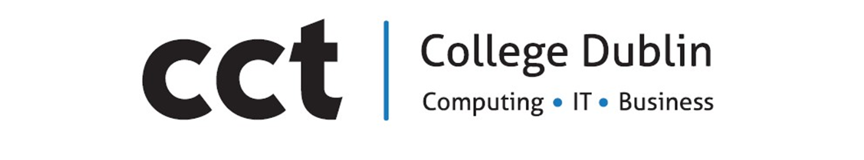

<h1 align="center">Subject: Machine Learning</h1>
<h2 align="center">Lecturer: David McQuaid</h2>
<h3 align="center">Caio Machado de Oliveira</h3>
<h4 align="center">ID: 2020351</h4>
<h5 align="center">April/2024</h5>


In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns

%matplotlib inline


# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

rcParams['figure.figsize'] = 15, 6

#ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pmdarima import auto_arima

from prophet import Prophet

from pandas import to_datetime




import itertools
import warnings

from datetime import datetime
from datetime import timedelta
from datetime import datetime
warnings.filterwarnings('ignore')



# Data Understanding

In [2]:
data = pd.read_csv("crime-per-county.csv")

data.head()

,STATISTIC Label,Quarter,Garda Division,Type of Offence,UNIT,VALUE
0,Recorded crime incidents,2003Q1,Cavan/Monaghan Garda Division,Homicide offences,Number,1.0
1,Recorded crime incidents,2003Q1,Cavan/Monaghan Garda Division,Murder,Number,0.0
2,Recorded crime incidents,2003Q1,Cavan/Monaghan Garda Division,Manslaughter,Number,0.0
3,Recorded crime incidents,2003Q1,Cavan/Monaghan Garda Division,Infanticide,Number,0.0
4,Recorded crime incidents,2003Q1,Cavan/Monaghan Garda Division,Dangerous driving leading to death,Number,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166992 entries, 0 to 166991
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   STATISTIC Label  166992 non-null  object 
 1   Quarter          166992 non-null  object 
 2   Garda Division   166992 non-null  object 
 3   Type of Offence  166992 non-null  object 
 4   UNIT             166992 non-null  object 
 5   VALUE            166383 non-null  float64
dtypes: float64(1), object(5)
memory usage: 7.6+ MB


In [4]:
data.describe()

,VALUE
count,166383.000000
mean,58.999219
std,149.652981
min,0.000000
25%,0.000000
50%,4.000000
75%,47.000000
max,2541.000000


In [5]:
data['Quarter'].unique()

array(['2003Q1', '2003Q2', '2003Q3', '2003Q4', '2004Q1', '2004Q2',
       '2004Q3', '2004Q4', '2005Q1', '2005Q2', '2005Q3', '2005Q4',
       '2006Q1', '2006Q2', '2006Q3', '2006Q4', '2007Q1', '2007Q2',
       '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3', '2008Q4',
       '2009Q1', '2009Q2', '2009Q3', '2009Q4', '2010Q1', '2010Q2',
       '2010Q3', '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4',
       '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2',
       '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4',
       '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2',
       '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4',
       '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2',
       '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4',
       '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2',
       '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3', '2023Q4'],
      dtype=object)

In [6]:
data['Garda Division'].unique()

array(['Cavan/Monaghan Garda Division', 'Donegal Garda Division',
       'Sligo/Leitrim Garda Division', 'Louth Garda Division',
       'Clare Garda Division', 'Mayo Garda Division',
       'Galway Garda Division', 'Roscommon/Longford Garda Division',
       'Cork City Garda Division', 'Cork North Garda Division',
       'Cork West Garda Division', 'Kerry Garda Division',
       'Limerick Garda Division', 'Laois/Offaly Garda Division',
       'Meath Garda Division', 'Wicklow Garda Division',
       'Westmeath Garda Division', 'Kildare Garda Division',
       'Tipperary Garda Division', 'Wexford Garda Division',
       'Kilkenny/Carlow Garda Division', 'Waterford Garda Division',
       'D.M.R. South Central Garda Division',
       'D.M.R. North Central Garda Division',
       'D.M.R. Northern Garda Division', 'D.M.R. Southern Garda Division',
       'D.M.R. Eastern Garda Division', 'D.M.R. Western Garda Division'],
      dtype=object)

In [7]:
data['Type of Offence'].unique()

array(['Homicide offences', 'Murder', 'Manslaughter', 'Infanticide',
       'Dangerous driving leading to death', 'Sexual offences',
       'Rape and sexual assault', 'Other sexual offences',
       'Attempts/threats to murder, assaults, harassments and related offences',
       'Murder-attempt', 'Threat to kill or cause serious harm',
       'Harassment and related offences',
       'Assault causing harm, poisoning', 'Other assault',
       'Dangerous or negligent acts',
       'Dangerous driving causing serious bodily harm',
       'Driving/in charge of a vehicle while over legal alcohol limit',
       'Driving/in charge of a vehicle under the influence of drugs',
       'Endangerment with potential for serious harm/death',
       'Abandoning a child, child neglect and cruelty',
       'Unseaworthy/dangerous use of boat or ship',
       'False alarm/interference with aircraft or air transport facilities',
       'Endangering traffic offences', 'Kidnapping and related offences',
     

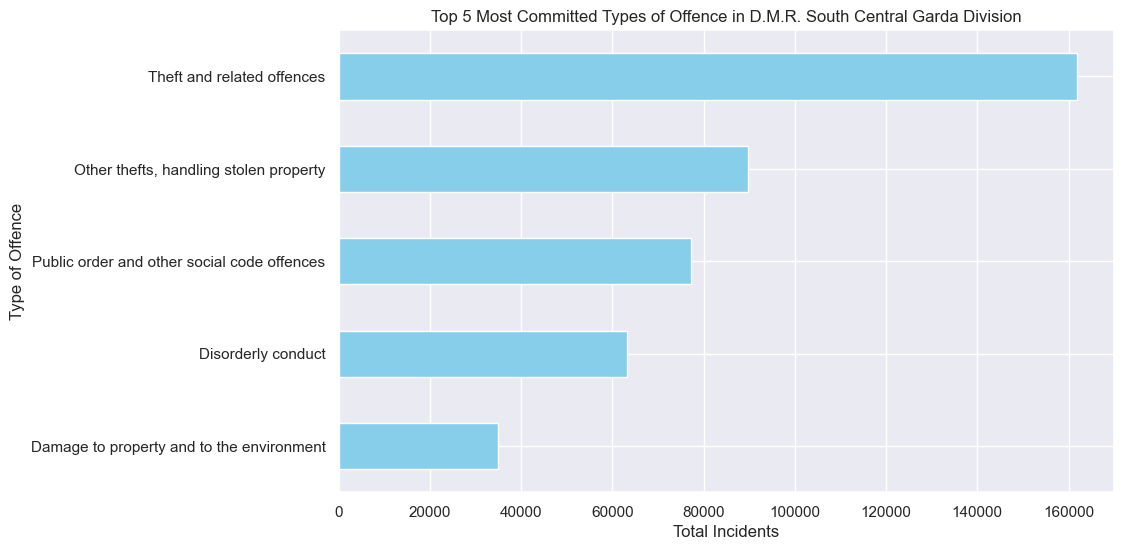

In [8]:
# Filter data for 'D.M.R. South Central Garda Division'
data_south_central = data[data['Garda Division'] == 'D.M.R. South Central Garda Division']

# Group by 'Type of Offence' and sum the 'VALUE' column to get total incidents for each type of offence
data_south_central_5 = data_south_central.groupby('Type of Offence')['VALUE'].sum()

# Sort the totals and get the top 5 most committed types of offences
data_south_central_plot = data_south_central_5.sort_values(ascending=False).head(5)

# Plot the data using horizontal bars
plt.figure(figsize=(10, 6))
data_south_central_plot.plot(kind='barh', color='skyblue')
plt.xlabel('Total Incidents')
plt.title('Top 5 Most Committed Types of Offence in D.M.R. South Central Garda Division')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value on top
plt.show()

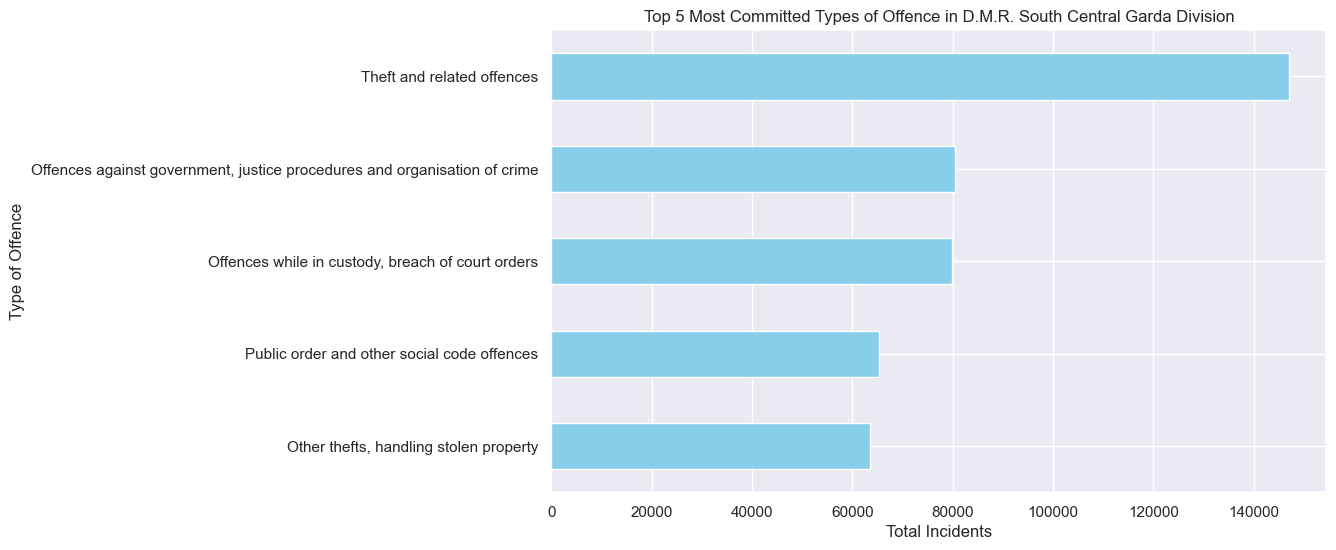

In [9]:
# Filter data for 'D.M.R. South Central Garda Division'
data_north_central = data[data['Garda Division'] == 'D.M.R. North Central Garda Division']

# Group by 'Type of Offence' and sum the 'VALUE' column to get total incidents for each type of offence
data_north_central_5 = data_north_central.groupby('Type of Offence')['VALUE'].sum()

# Sort the totals and get the top 5 most committed types of offences
data_north_central_plot = data_north_central_5.sort_values(ascending=False).head(5)

# Plot the data using horizontal bars
plt.figure(figsize=(10, 6))
data_north_central_plot.plot(kind='barh', color='skyblue')
plt.xlabel('Total Incidents')
plt.title('Top 5 Most Committed Types of Offence in D.M.R. South Central Garda Division')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value on top
plt.show()

# Data Preparation

In [10]:
data.drop(columns =["STATISTIC Label", "UNIT"], inplace=True)


In [11]:
data.rename(columns = {'Type of Offence': 'Offence', 'VALUE': 'Crime'}, inplace=True)

In [12]:
# Removing "Garda Division" from each entry
data['Garda Division'] = data['Garda Division'].str.replace(" Garda Division", "")

In [13]:
data['Crime'] = data['Crime'].fillna(0)


In [14]:
data['Crime'] = data['Crime'].astype('int64')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166992 entries, 0 to 166991
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Quarter         166992 non-null  object
 1   Garda Division  166992 non-null  object
 2   Offence         166992 non-null  object
 3   Crime           166992 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.1+ MB


In [16]:
def quarter_to_date(year_quarter):
    year, quarter = year_quarter.split('Q')
    first_month = {'1': '01', '2' : '04' , '3' : '07' , '4' : '10'}
    return f"{year}-{first_month[quarter]}-1"

data['Date'] = data['Quarter'].apply(quarter_to_date)



In [17]:
# Correct way using .loc to avoid SettingWithCopyWarning
data.loc[:, 'Date'] = pd.to_datetime(data['Date'])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166992 entries, 0 to 166991
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Quarter         166992 non-null  object
 1   Garda Division  166992 non-null  object
 2   Offence         166992 non-null  object
 3   Crime           166992 non-null  int64 
 4   Date            166992 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.4+ MB


In [19]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [20]:
data.drop(columns =['Quarter'], inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 166992 entries, 2003-01-01 to 2023-10-01
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Garda Division  166992 non-null  object
 1   Offence         166992 non-null  object
 2   Crime           166992 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.1+ MB


In [22]:
data = data[data['Crime'] != 0]

In [23]:
data.info() 
data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120808 entries, 2003-01-01 to 2023-10-01
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Garda Division  120808 non-null  object
 1   Offence         120808 non-null  object
 2   Crime           120808 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


,Crime
count,120808.000000
mean,81.256763
std,170.400775
min,1.000000
25%,2.000000
50%,16.000000
75%,86.000000
max,2541.000000


In [24]:
data.head(10)

,Garda Division,Offence,Crime
Date,,,
2003-01-01,Cavan/Monaghan,Homicide offences,1
2003-01-01,Cavan/Monaghan,Dangerous driving leading to death,1
2003-01-01,Cavan/Monaghan,Sexual offences,23
2003-01-01,Cavan/Monaghan,Rape and sexual assault,23
2003-01-01,Cavan/Monaghan,"Attempts/threats to murder, assaults, harassme...",128
2003-01-01,Cavan/Monaghan,Harassment and related offences,16
2003-01-01,Cavan/Monaghan,"Assault causing harm, poisoning",22
2003-01-01,Cavan/Monaghan,Other assault,90
2003-01-01,Cavan/Monaghan,Dangerous or negligent acts,123


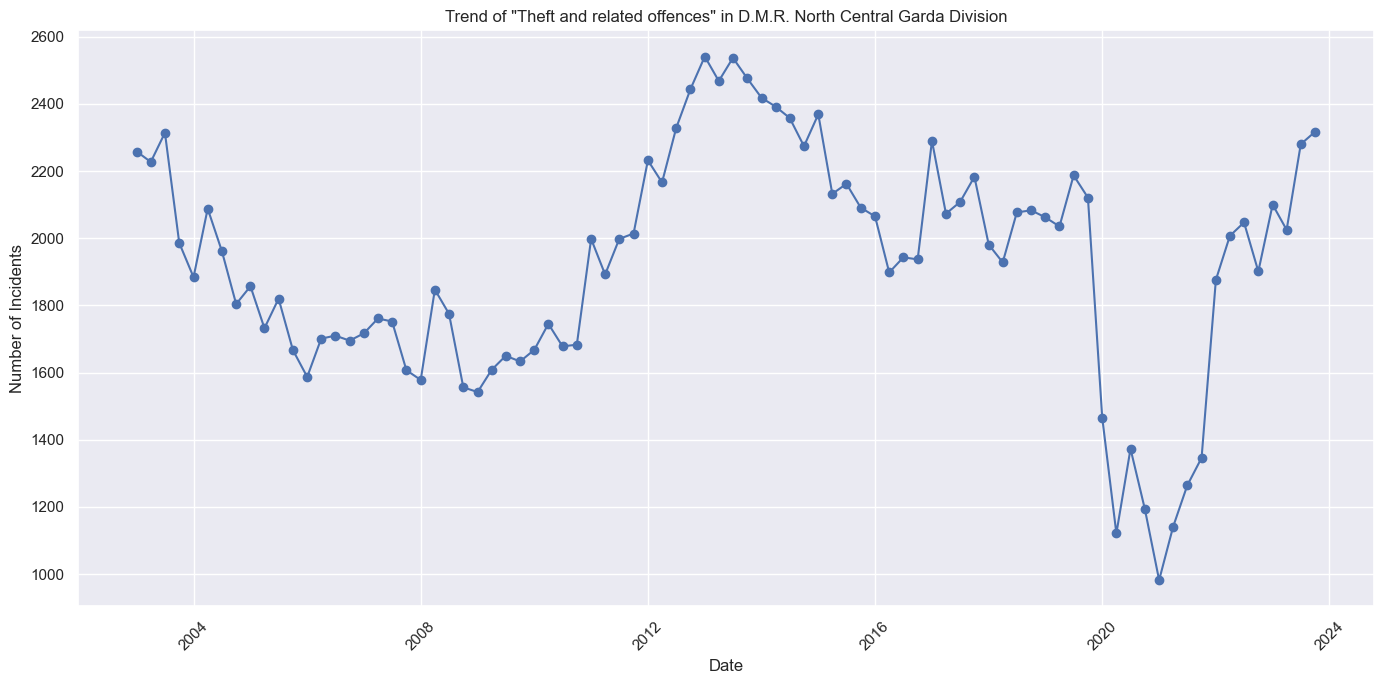

In [25]:
# Filter the data for "Theft from person" crimes in "D.M.R. North Central Garda Division"
theft_from_person_data = data[
    (data['Offence'] == 'Theft and related offences') &
    (data['Garda Division'] == 'D.M.R. South Central')
]


# Plotting the line graph
plt.figure(figsize=(14, 7))
plt.plot(theft_from_person_data.index, theft_from_person_data['Crime'], marker='o', linestyle='-', color='b')
plt.title('Trend of "Theft and related offences" in D.M.R. North Central Garda Division')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


In [26]:
theft_from_person_data.drop(columns =['Garda Division', 'Offence'], inplace=True)


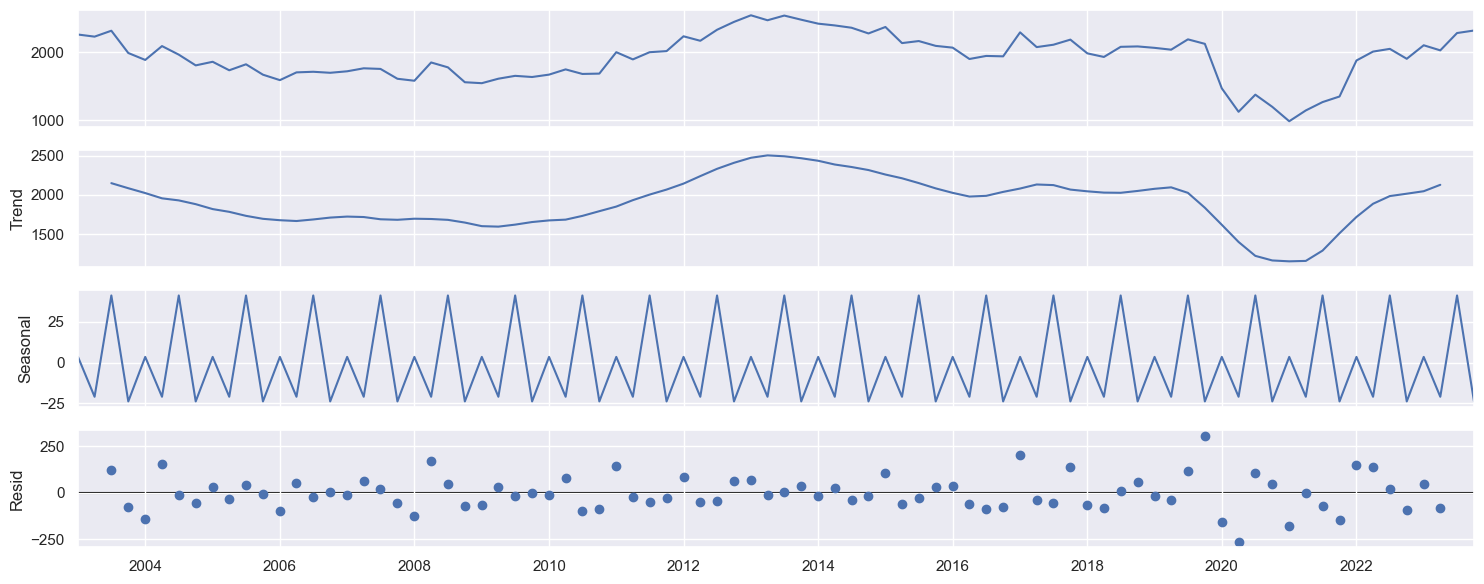

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(theft_from_person_data, model='additive')

# Plot the decomposed components
decomposition.plot()
plt.show()

In [28]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(theft_from_person_data['Crime'])

# Display the results of the ADF test
adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result[4].items():
    adf_output['Critical Value (%s)' % key] = value

adf_output

Test Statistic                 -2.745914
p-value                         0.066425
#Lags Used                      4.000000
Number of Observations Used    79.000000
Critical Value (1%)            -3.515977
Critical Value (5%)            -2.898886
Critical Value (10%)           -2.586694
dtype: float64

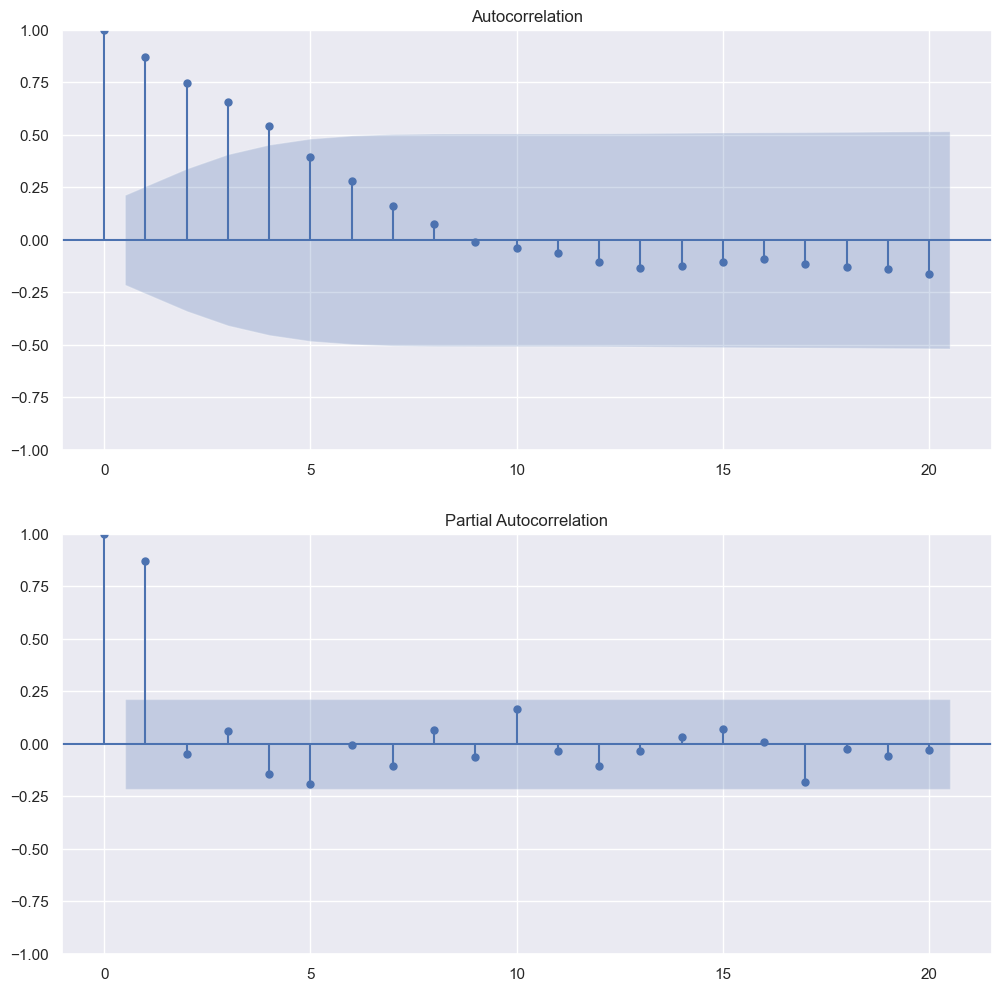

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure for plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot the Autocorrelation Function (ACF)
plot_acf(theft_from_person_data, lags=20, ax=ax1)

# Plot the Partial Autocorrelation Function (PACF)
plot_pacf(theft_from_person_data, lags=20, ax=ax2, method='ywm')

plt.show()

# START TRAINING


In [30]:
train = theft_from_person_data['Crime'].loc['2003-01-01': '2017-10-01']
test = theft_from_person_data['Crime'].loc['2018-01-01':'2019-10-01']
theft_from_person_data = theft_from_person_data.loc['2003-01-01':'2019-10-01']

<Axes: xlabel='Date'>

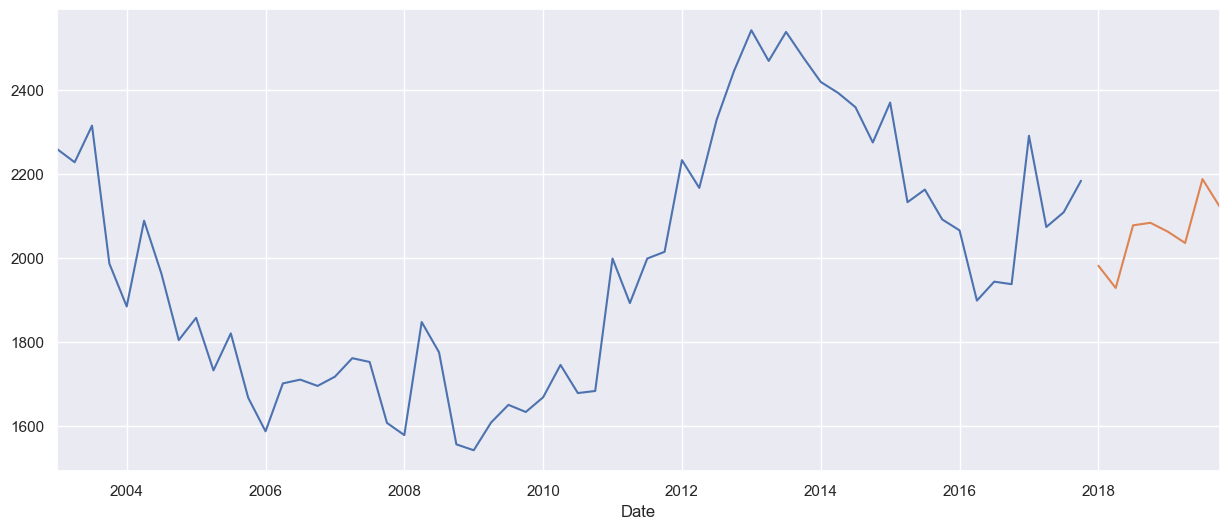

In [31]:
train.plot()
test.plot()

In [32]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(train)

# Display the results of the ADF test
adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result[4].items():
    adf_output['Critical Value (%s)' % key] = value

adf_output

Test Statistic                 -1.526337
p-value                         0.520445
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64

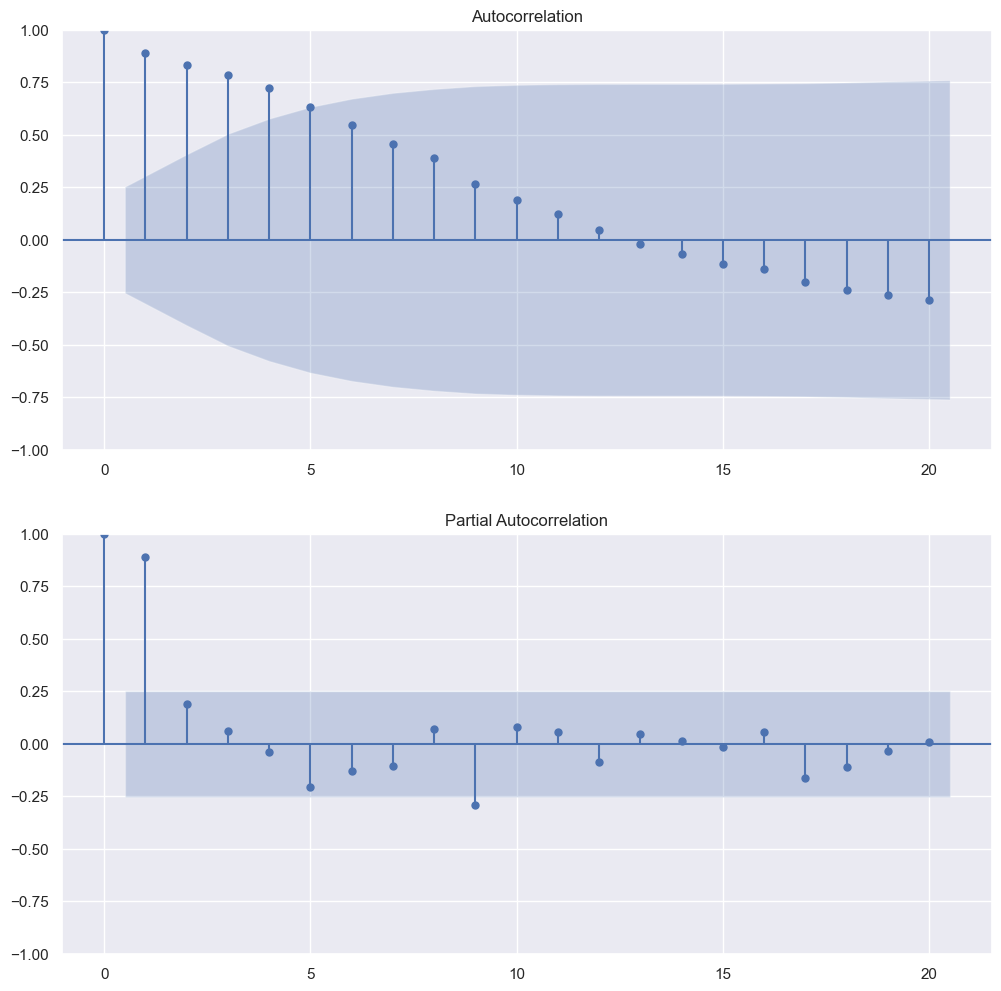

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure for plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot the Autocorrelation Function (ACF)
plot_acf(train, lags=20, ax=ax1)

# Plot the Partial Autocorrelation Function (PACF)
plot_pacf(train, lags=20, ax=ax2, method='ywm')

plt.show()

# DIFFERENCING TRAINING DATA

<Axes: xlabel='Date'>

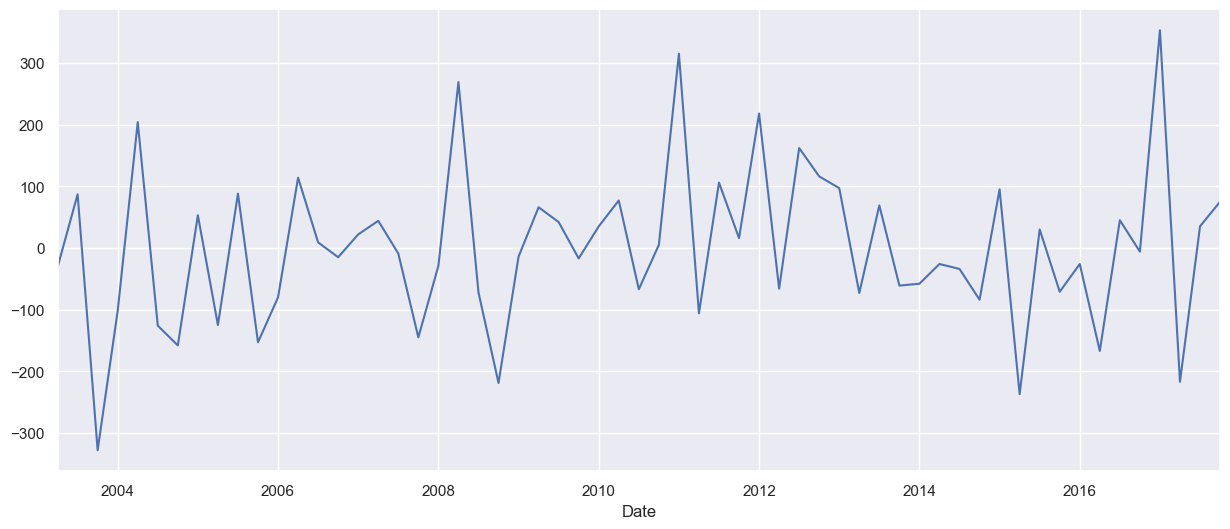

In [34]:
train_diff = train.diff().dropna()
train_diff.plot()

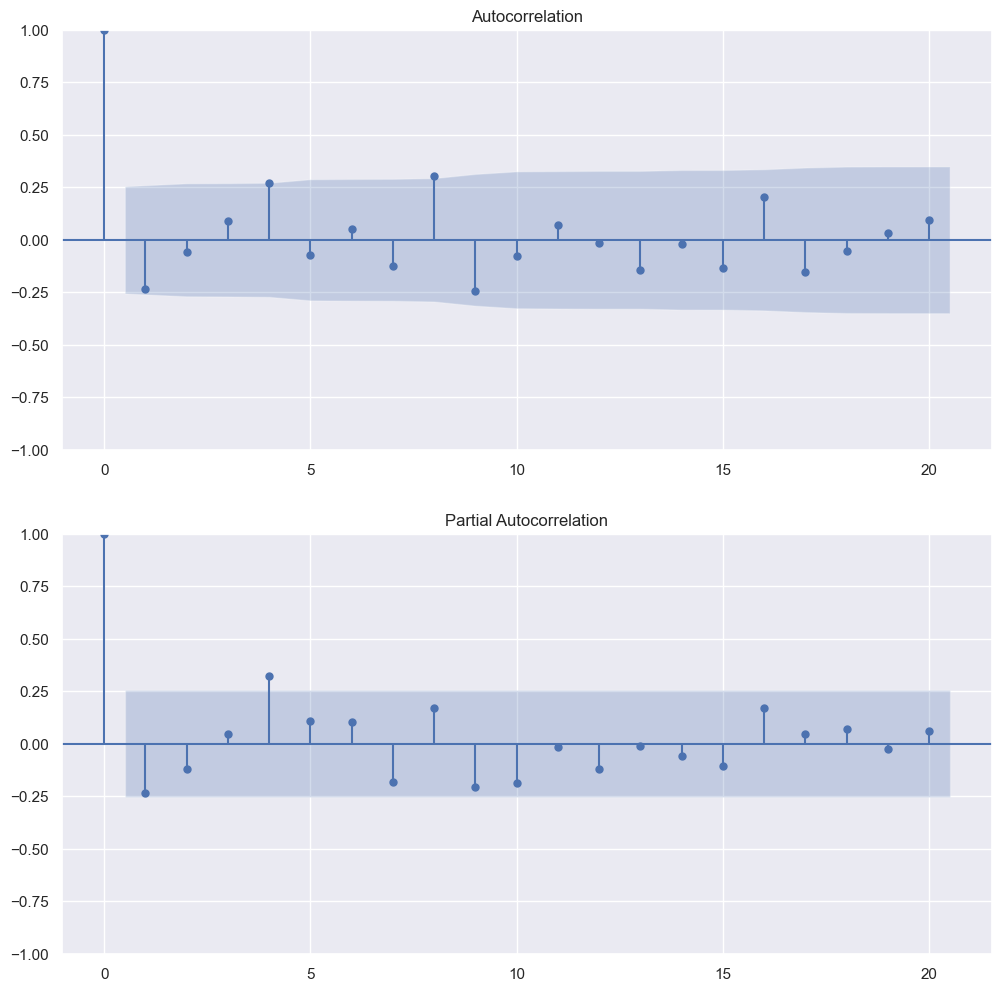

In [35]:
# Create figure for plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot the Autocorrelation Function (ACF)
plot_acf(train_diff, lags=20, ax=ax1)

# Plot the Partial Autocorrelation Function (PACF)
plot_pacf(train_diff, lags=20, ax=ax2, method='ywm')

plt.show()

In [36]:
# Perform Augmented Dickey-Fuller test
adf_result = adfuller(train_diff)

# Display the results of the ADF test
adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result[4].items():
    adf_output['Critical Value (%s)' % key] = value

adf_output

Test Statistic                 -2.942449
p-value                         0.040630
#Lags Used                      3.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64

# AUTO ARIMA 

In [37]:
auto_arima = pm.auto_arima(train, stepwise=False, seasonal=False) #Seasonal = False applies only for ARIMA, if its True, for SARIMA
auto_arima

ARIMA(order=(1, 1, 4), scoring_args={}, suppress_warnings=True)

# FOR LOOP ARIMA

In [38]:
# # Define the range of parameters
# p = range(0, 10)  # Range of AR parameters
# d = range(0, 2)   # Range of I parameters
# q = range(0, 10)  # Range of MA parameters

# # Generate all combinations of p, d, q triplets
# pdq = list(itertools.product(p, d, q))


# print('Examples of parameter combinations for ARIMA...')
# print('ARIMA: {}'.format(pdq[1]))
# print('ARIMA: {}'.format(pdq[2]))

# warnings.filterwarnings("ignore")  # Suppress warnings to keep output clean

# AIC = []
# ARIMA_model = []
# for param in pdq:
#     try:
#         mod = ARIMA(train, order=param)
#         results = mod.fit()
#         print('ARIMA{} - AIC:{}'.format(param, results.aic))
#         AIC.append(results.aic)
#         ARIMA_model.append(param)
#     except Exception as e:
#         print(f'Failed to fit ARIMA{param}: {str(e)}')

# if AIC:  # Check if the list is not empty
#     min_aic_index = AIC.index(min(AIC))  # Index of the minimum AIC
#     best_param = ARIMA_model[min_aic_index]
#     print(f"Best ARIMA model: ARIMA{best_param} with AIC {min(AIC)}")
# else:
#     print("No successful model fits were found.")

In [39]:
# Best ARIMA model: ARIMA(7, 1, 4) with AIC 732.3573376006198

# APPLYING ARIMA 

In [169]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(7,2,4))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Crime   No. Observations:                   67
Model:                 ARIMA(7, 2, 4)   Log Likelihood                -396.301
Date:                Sat, 11 May 2024   AIC                            816.602
Time:                        23:50:58   BIC                            842.694
Sample:                    01-01-2003   HQIC                           826.897
                         - 07-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8988      0.298     -3.013      0.003      -1.483      -0.314
ar.L2         -0.6061      0.443     -1.369      0.171      -1.474       0.262
ar.L3         -0.1246      0.589     -0.212      0.8

# CHECKIN RESIDUALS

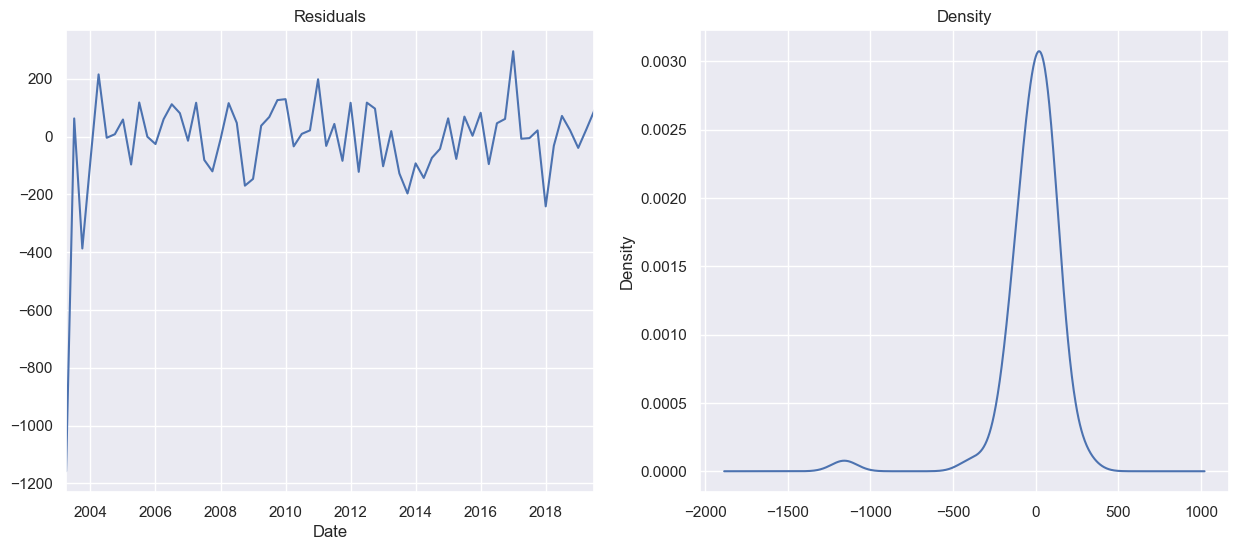

In [170]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

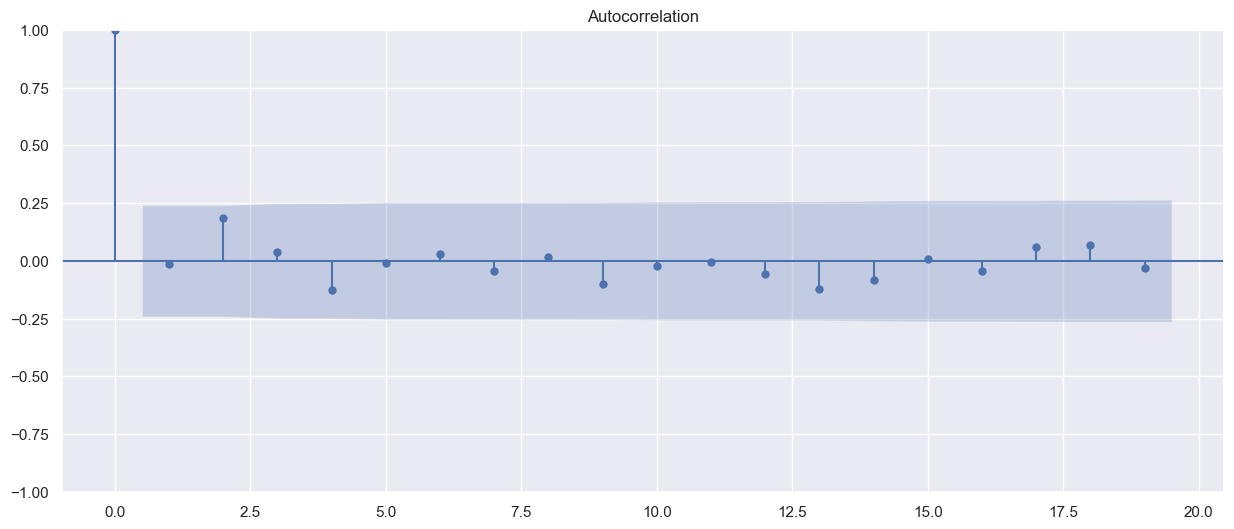

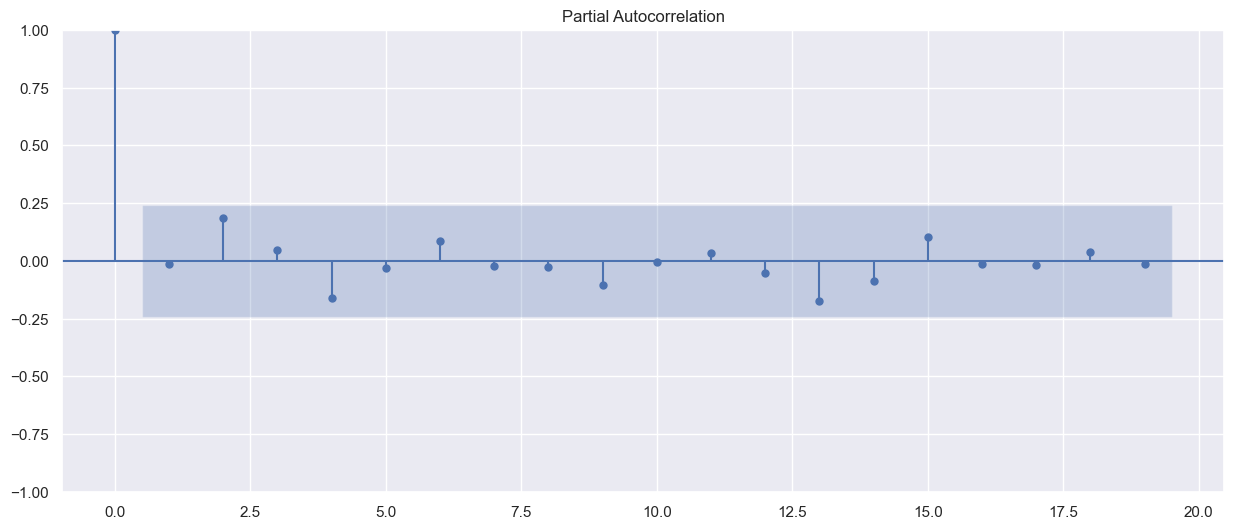

In [171]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

# FORECASTING 

In [172]:
# Forecast the same number of steps as in the test set
forecast_steps = len(test)
forecast = model_fit.get_forecast(steps=forecast_steps)
predicted_values = forecast.predicted_mean


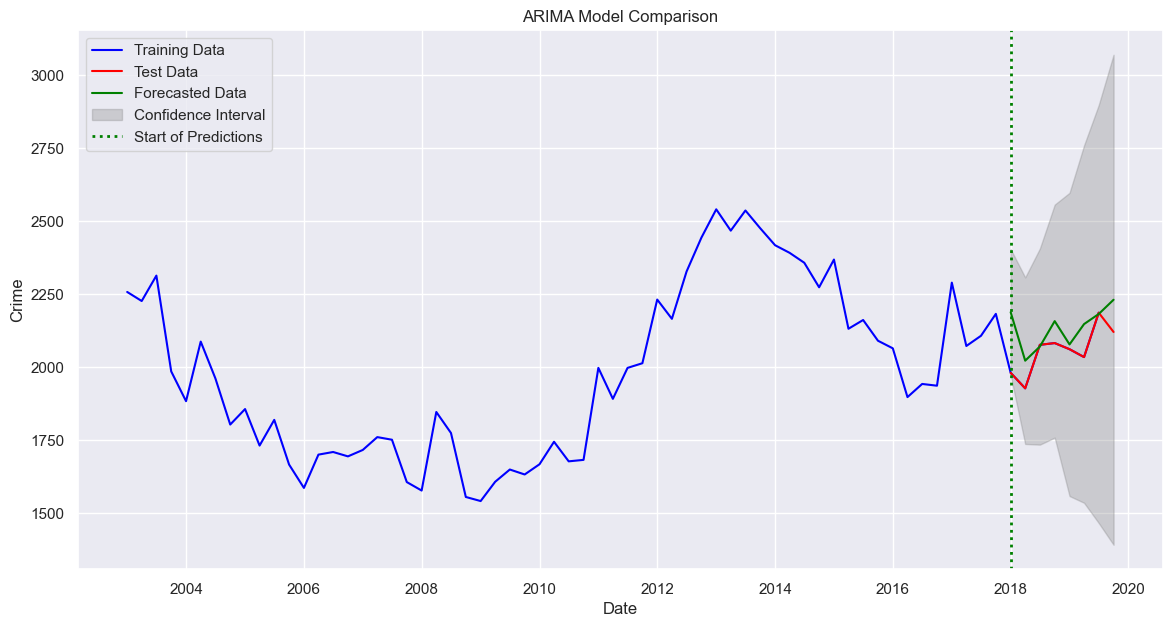

In [175]:
plt.figure(figsize=(14, 7))  # Adjusting figure size to match the first plot


# Plotting training data
plt.plot(train, label='Training Data', color='blue')  
# Plotting test data
plt.plot(test.index, test, label='Test Data', color='red')  

# Plotting forecasted data
plt.plot(test.index, predicted_values, label='Forecasted Data', color='green')  

# Adding confidence interval
plt.fill_between(test.index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='gray', alpha=0.3, label='Confidence Interval')  

# adding a line where the model starts
plt.axvline(x=test.index[0], color='green', linestyle=':', linewidth=2, label='Start of Predictions')

# Adding titles and labels similar to the first plot
plt.title('ARIMA Model Comparison')
plt.xlabel('Date')
plt.ylabel('Crime')  # Adjust label according to the data context
plt.legend()
plt.grid(True)  # Enabling grid for better visualization
plt.show()


# EVALUATION

In [174]:
# Calculate RMSE
rmse = np.sqrt(((predicted_values - test) ** 2).mean())
mae = mean_absolute_error(test, predicted_values)
# Calculate the R² score
r2 = r2_score(test, predicted_values)

print('MAE:', round(mae, 2))
print('RMSE:', round(rmse, 2))
print(f'R² score: {r2}')

MAE: 78.45
RMSE: 67.58
R² score: -0.8454010088029336


# SEASONAL ARIMA MODEL

## FOR LOOP SARIMA

In [46]:
# import itertools

# # Define the d and q parameters to take any value between 0 and 1
# d = range(0, 2)
# # Define the p parameters to take any value between 0 and 3
# q = p = range(0, 10)

# # Generate all different combinations of p, q and q triplets
# pdq = list(itertools.product(p, d, q))

# # Generate all different combinations of seasonal p, q and q triplets
# seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

# print('Examples of parameter combinations for Seasonal ARIMA...')
# print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
# print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
# print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
# print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [47]:
# import statsmodels.api as sm

# warnings.filterwarnings("ignore") # specify to ignore warning messages

# AIC = []
# SARIMAX_model = []
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(train,
#                                             order=param,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             results = mod.fit()

#             print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
#             AIC.append(results.aic)
#             SARIMAX_model.append([param, param_seasonal])
#         except:
#             continue

In [48]:
# print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))
# #The smallest AIC is 429.935229273857 for model SARIMAX(3, 1, 1)x(9, 1, 0, 4) 30/04/2024 

# AUTO_ARIMA (SARIMA)

In [179]:
import statsmodels.api as sm
import pmdarima as pm

best_model = pm.auto_arima(train,
                           start_p=0, start_q=0,
                           max_p=12, max_q=12,
                           start_P=0, start_Q=0,
                           max_P=12, max_Q=12,
                           m=4,
                           d=None, D=None,
                           max_d=3, max_D=2,
                           seasonal=True,
                           stepwise=True,
                           trace=True,
                           test='adf',
                           error_action='ignore',
                           suppress_warnings=True,
                           seasonal_test='ocsb',
                           information_criterion='aic',
                           n_jobs=-1)

# print(best_model.summary())



Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=875.197, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=852.647, Time=0.04 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=inf, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[4]             : AIC=853.627, Time=0.01 sec
 ARIMA(1,2,0)(2,0,0)[4]             : AIC=847.799, Time=0.06 sec
 ARIMA(1,2,0)(3,0,0)[4]             : AIC=848.112, Time=0.09 sec
 ARIMA(1,2,0)(2,0,1)[4]             : AIC=843.679, Time=0.20 sec
 ARIMA(1,2,0)(1,0,1)[4]             : AIC=850.689, Time=0.08 sec
 ARIMA(1,2,0)(3,0,1)[4]             : AIC=845.672, Time=0.24 sec
 ARIMA(1,2,0)(2,0,2)[4]             : AIC=845.668, Time=0.17 sec
 ARIMA(1,2,0)(1,0,2)[4]             : AIC=846.377, Time=0.21 sec
 ARIMA(1,2,0)(3,0,2)[4]             : AIC=847.679, Time=0.27 sec
 ARIMA(0,2,0)(2,0,1)[4]             : AIC=860.498, Time=0.11 sec
 ARIMA(2,2,0)(2,0,1)[4]             : AIC=826.894, Time=0.25 sec
 ARIMA(2,2,0)(1,0,1)[4]             : AIC=827.188, 

# APPLYING SARIMA 

In [193]:
model = SARIMAX(train, order=(3,2,3), 
                seasonal_order=(1, 0, 1, 4),
                enforce_stationarity=False,
                enforce_invertibility=False)


model = model.fit()
print(model.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1483      0.077    -14.907      0.000      -1.299      -0.997
ar.L2         -1.0330      0.104     -9.894      0.000      -1.238      -0.828
ar.L3         -0.9013      0.106     -8.480      0.000      -1.110      -0.693
ma.L1         -0.0216      0.225     -0.096      0.924      -0.463       0.420
ma.L2         -0.0521      0.225     -0.231      0.817      -0.493       0.389
ma.L3          0.1226      0.231      0.531      0.596      -0.330       0.576
ar.S.L4        0.0278      0.256      0.109      0.914      -0.473       0.529
ma.S.L4       -0.8032      0.296     -2.716      0.007      -1.383      -0.224
sigma2      1.281e+04   3247.167      3.944      0.000    6442.431    1.92e+04


# FORECASTING 

In [194]:
# Get predictions for the test data
forecast = model.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)
predictions = forecast.predicted_mean
ci = forecast.conf_int()

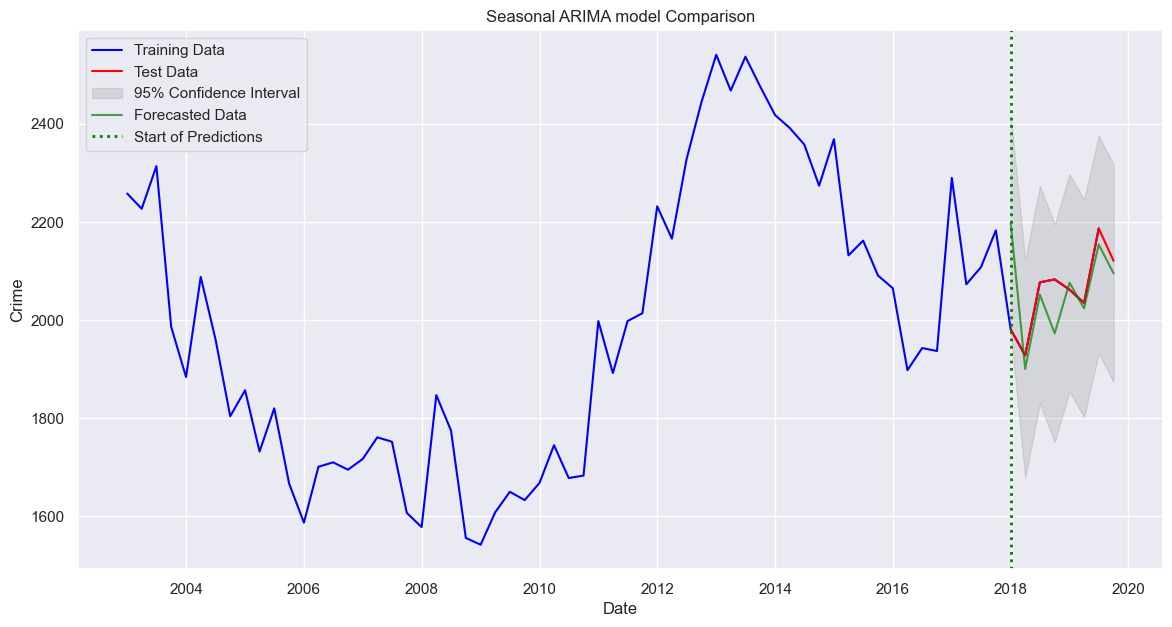

In [195]:
# Assuming 'theft_from_person_data', 'ci', and 'predictions' are defined properly
plt.figure(figsize=(14, 7))


# Plotting training data
plt.plot(train, label='Training Data', color='blue')  

# Plotting testoing data
plt.plot(test.index, test, label='Test Data', color='red')  # Using red for test data

# Adding confidence interval
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.2, label='95% Confidence Interval')

# Highlight the prediction period
plt.plot(predictions.index, predictions, label='Forecasted Data', color='green', alpha=0.7)

# adding a line where the model starts
plt.axvline(x=test.index[0], color='green', linestyle=':', linewidth=2, label='Start of Predictions')

plt.xlabel('Date')
plt.ylabel('Crime')
plt.title('Seasonal ARIMA model Comparison')
plt.legend(loc='upper left')
plt.grid(True)  # Adding a grid for better readability
plt.show()

# EVALUATION

In [196]:
# Calculate RMSE
rmse = np.sqrt(((predictions - test) ** 2).mean())
mae = mean_absolute_error(test, predictions)
# Calculate the R² score
r2 = r2_score(test, predictions)

print('MAE:', round(mae, 2))
print('RMSE:', round(rmse, 2))
print(f'R² score: {r2}')

MAE: 57.94
RMSE: 88.44
R² score: -0.3917437356246065


Text(0, 0.5, 'Error')

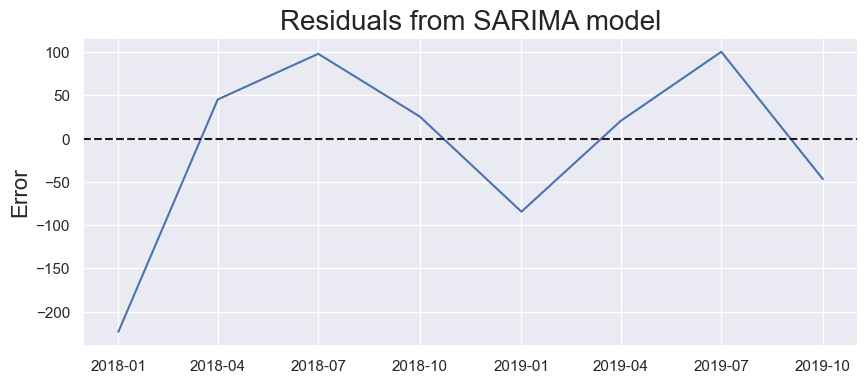

In [184]:

residuals = test - predictions

plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA model', fontsize=20)
plt.ylabel('Error', fontsize=16)

# APPLYING ROLLING MODEL

In [197]:
train_end = pd.Timestamp('2019-12-31')
rolling_predictions = test.copy()
for train_end in test.index:
    train = theft_from_person_data['Crime'][:train_end - pd.DateOffset(months=3)]
    model = SARIMAX(train,order=(3,2,3),seasonal_order=(1,0,1,4)) 

    model_fit = model.fit()
    
    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

In [198]:
rolling_residuals = test - rolling_predictions

Text(0, 0.5, 'Error')

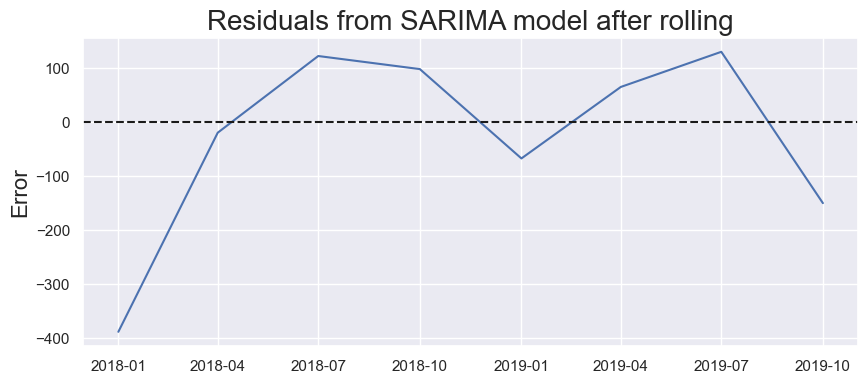

In [199]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA model after rolling', fontsize=20)
plt.ylabel('Error', fontsize=16)

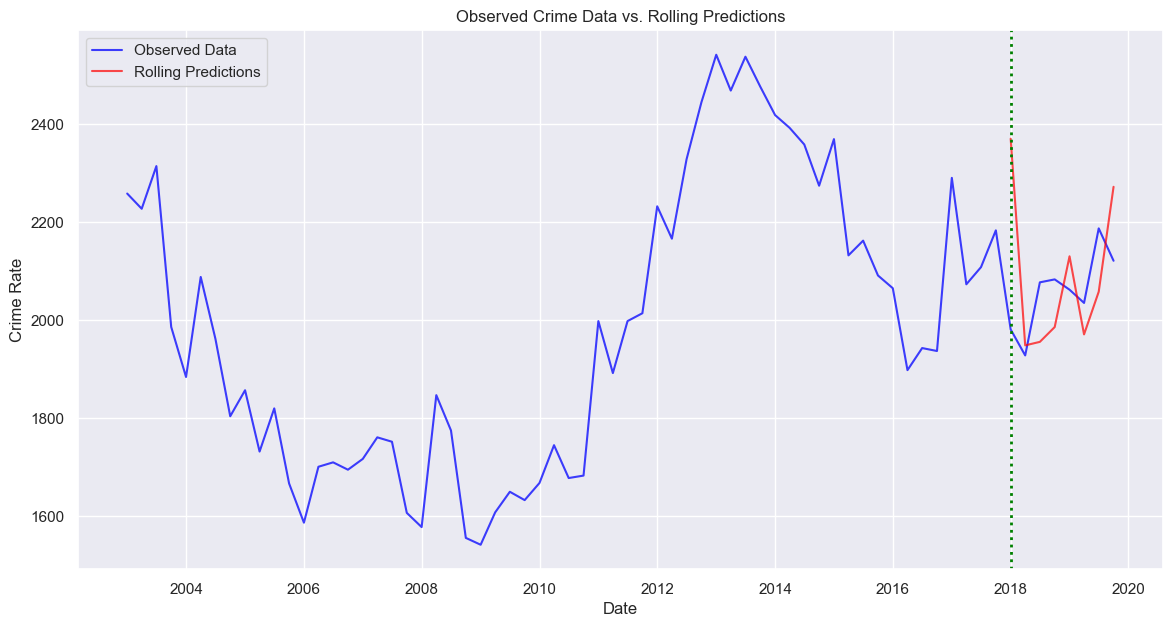

In [200]:
# Begin visualization improvements
plt.figure(figsize=(14, 7))

# Plot the actual data
plt.plot(theft_from_person_data['Crime'].index, theft_from_person_data['Crime'], label='Observed Data', color='blue', alpha=0.75)
# Plot rolling predictions
plt.plot(rolling_predictions.index, rolling_predictions, label='Rolling Predictions', color='red', alpha=0.7)


# Adding enhancements
plt.title('Observed Crime Data vs. Rolling Predictions')  # Title
plt.xlabel('Date')  # X-axis label
plt.ylabel('Crime Rate')  # Y-axis label
plt.grid(True)  # Add gridlines for better readability
plt.legend()  # Ensure legend is correctly placed

# Highlight the prediction period
plt.axvline(x=test.index[0], color='green', linestyle=':', linewidth=2, label='Start of Predictions')

plt.show()


# EVALUATION 

In [201]:
mae = mean_absolute_error(test, rolling_predictions)
rmse = np.sqrt(mean_squared_error(test, rolling_predictions))
# Calculate the R² score
r2 = r2_score(test, rolling_predictions)



print("MAE:", mae)
print("RMSE:", rmse)
# Print the R² score
print(f'R² score: {r2}')


MAE: 129.99821615840608
RMSE: 167.30529617095218
R² score: -3.980892999272651


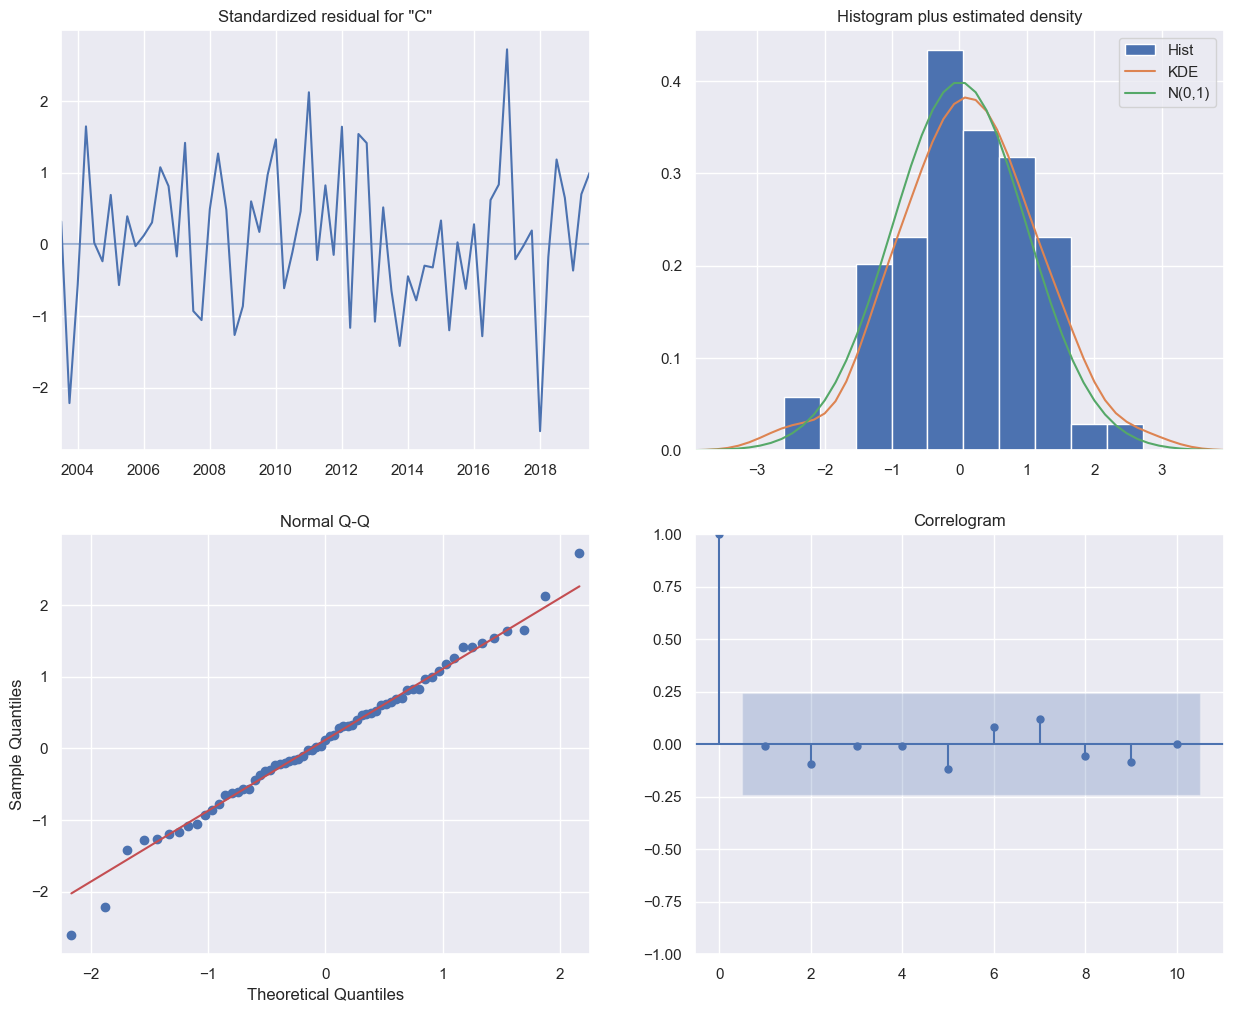

In [202]:
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

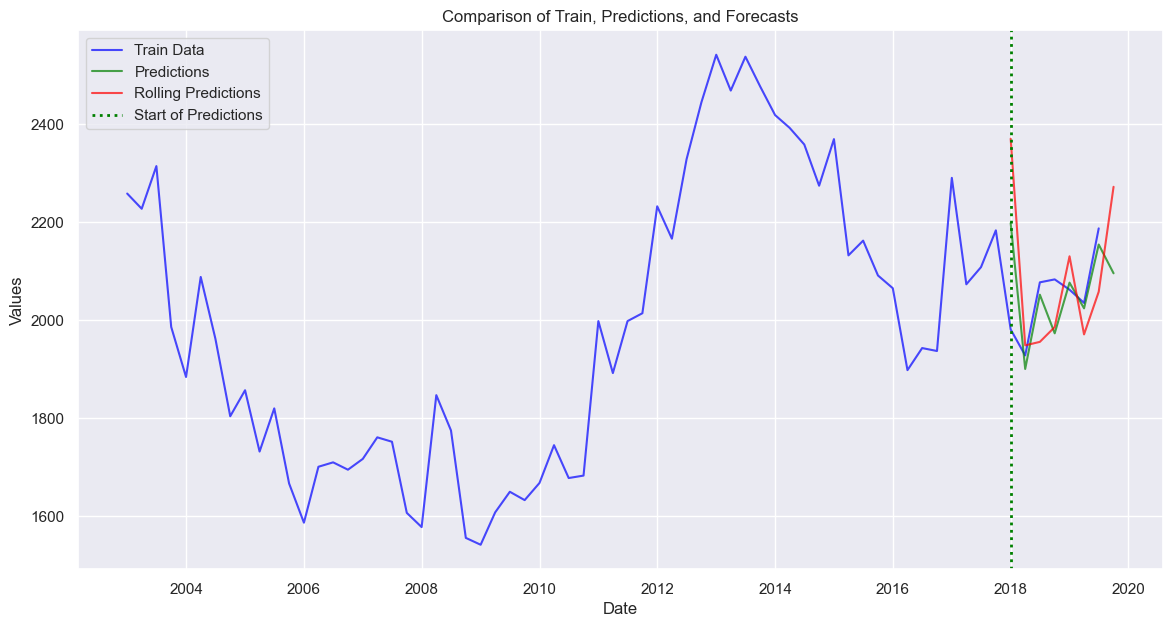

In [203]:
# Example figsize set for better display
plt.figure(figsize=(14, 7))

# Plotting each time series with specific color and style
plt.plot(train.index, train, color='blue', label='Train Data', alpha=0.7)
plt.plot(predictions.index, predictions, color='green', label='Predictions', alpha=0.7)
plt.plot(rolling_predictions.index, rolling_predictions, color='red', label='Rolling Predictions', alpha=0.7)

# Highlight the prediction period
plt.axvline(x=test.index[0], color='green', linestyle=':', linewidth=2, label='Start of Predictions')

# Enhancements for readability
plt.title('Comparison of Train, Predictions, and Forecasts')  # Adding a title
plt.xlabel('Date')  # X-axis label
plt.ylabel('Values')  # Y-axis label
plt.grid(True)  # Enable grid for easier reading
plt.legend(loc='best')  # Relocate legend to the best location

# Show the plot
plt.show()
